## Лабораторная работа 2

**Конформное отображение** — это отображение, при котором
сохраняется форма бесконечно малых фигур и углы между кривыми в точках их пересечения. Основными линейными конформными
преобразованиями являются евклидовы преобразования.
К ним относятся сдвиг, отражение, однородное масштабирование и поворот.
Конформные преобразования являются подмножеством аффинных
преобразований.

В OpenCV афинные преобразования делаются с помощью функции **warpAffine**

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from math import *

In [ ]:
# Считаю исходное изображение
image = cv2.imread("/content/drive/MyDrive/lr2/itmo.jpg")

In [ ]:
# Разрешение 800 на 1200 пикселей и 3 канала BGR
print(image.shape)

(800, 1200, 3)


In [ ]:
# Исходное изображение
figure(figsize=(32, 16), dpi=80)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.xticks([]),plt.yticks([])
plt.show()

Output hidden; open in https://colab.research.google.com to view.

### Сдвиг изображения на 500 и 200 пикселей по осям 𝑂𝑥 и 𝑂𝑦 соответственно.

In [ ]:
M = np.array([[1, 0, 500],
              [0, 1, 200]], dtype=np.float64)
print(M)
image_moved = cv2.warpAffine(image, M, (image.shape[0:2])[::-1])

[[  1.   0. 500.]
 [  0.   1. 200.]]


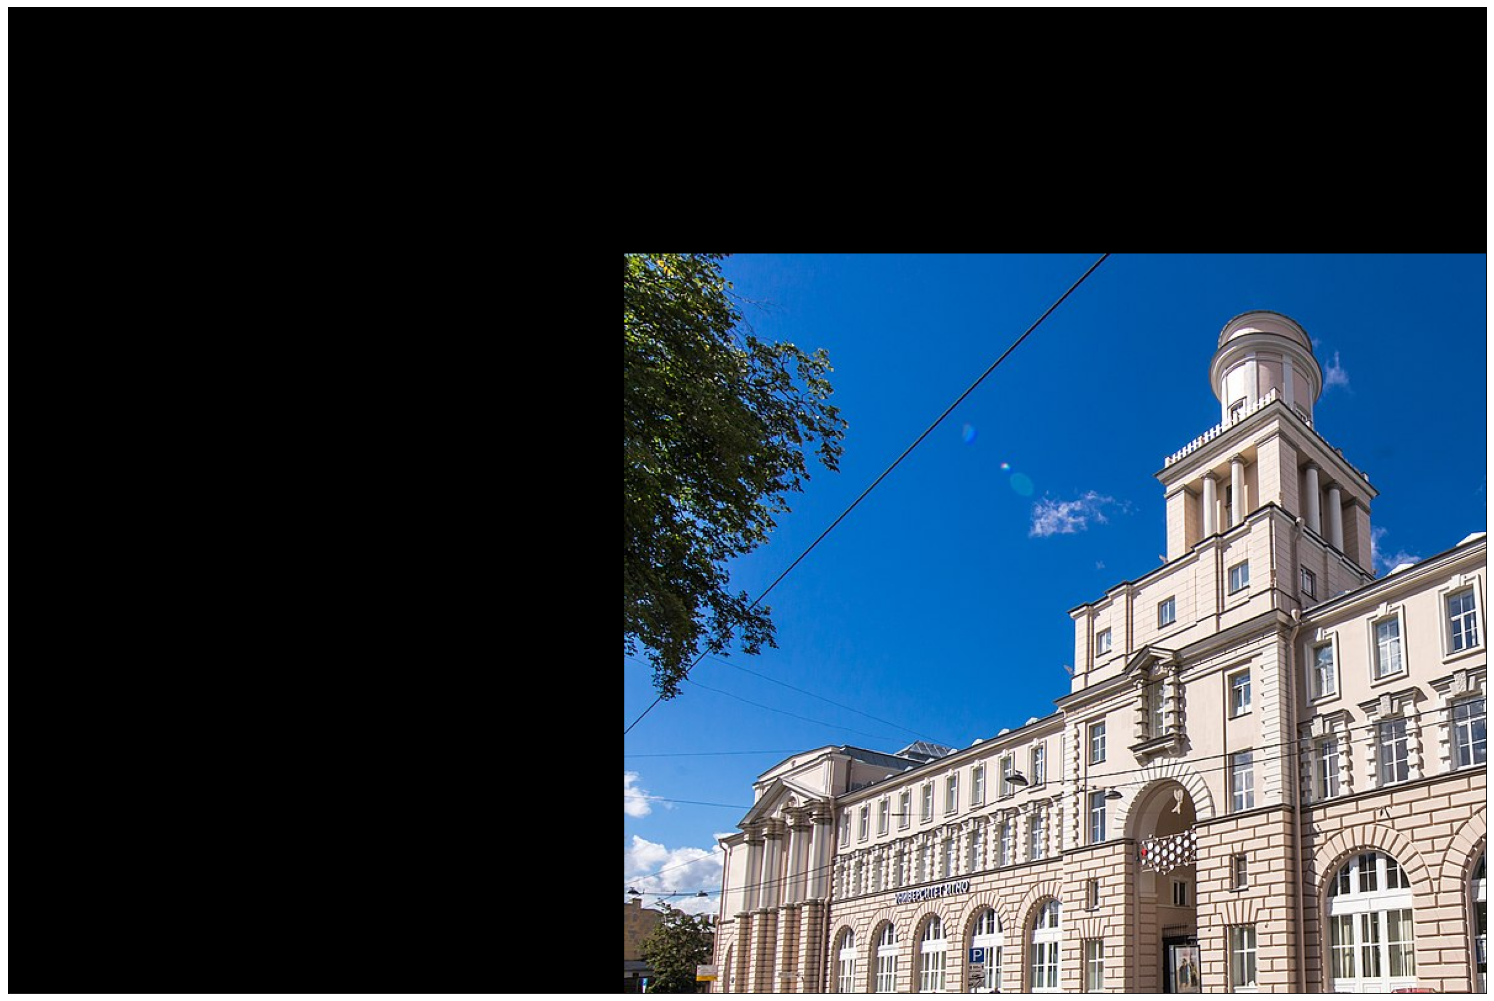

In [ ]:
figure(figsize=(32, 16), dpi=80)
plt.imshow(cv2.cvtColor(image_moved, cv2.COLOR_BGR2RGB))
plt.xticks([]),plt.yticks([])
plt.show()

### Отражение относительно оси 𝑂y.

Так как в OpenCV по умолчанию центр изображения находится в левом верхнем углу,
то изображения нужно дополнительно сместить в центр. Обычно встроенные функции делают это сами,
но если писать матрицы преобразования вручную, тогда придётся это помнить.

In [ ]:
M = np.array([[-1, 0, image.shape[1]],
              [0, 1, 0]], dtype=np.float64)
print(M)
image_mirrored = cv2.warpAffine(image, M, (image.shape[0:2])[::-1])


[[-1.0e+00  0.0e+00  1.2e+03]
 [ 0.0e+00  1.0e+00  0.0e+00]]


In [ ]:
figure(figsize=(32, 16), dpi=80)
plt.imshow(cv2.cvtColor(image_mirrored, cv2.COLOR_BGR2RGB))
plt.xticks([]),plt.yticks([])
plt.show()

Output hidden; open in https://colab.research.google.com to view.

### Увеличение исходного изображения в два раза.


In [ ]:
center = (image.shape[1] / 2, image.shape[0] / 2)
pts1 = np.array([[center[0], center[1]],
                      [center[0] + 100, center[1] + 100],
                      [center[0] + 100, center[1] - 100]],
                     dtype=np.float32)
pts2 = np.array([[center[0], center[1]],
                      [center[0] + 200, center[1] + 200],
                      [center[0] + 200, center[1] - 200]],
                     dtype=np.float32)
M = cv2.getAffineTransform(pts1, pts2)
print(M)
image_scaled = cv2.warpAffine(image, M, (image.shape[0:2])[::-1])

[[ 2.0000000e+00 -0.0000000e+00 -6.0000000e+02]
 [-4.0602442e-16  2.0000000e+00 -4.0000000e+02]]


In [ ]:
figure(figsize=(32, 16), dpi=80)
plt.imshow(cv2.cvtColor(image_scaled, cv2.COLOR_BGR2RGB))
plt.xticks([]),plt.yticks([])
plt.show()

Output hidden; open in https://colab.research.google.com to view.

### Поворот изображения на 𝜙 = 37 градусов

In [ ]:
center = (image.shape[1] / 2, image.shape[0] / 2)
M = cv2.getRotationMatrix2D(center, 37, 1)
print(M)
image_rotated = cv2.warpAffine(image, M, (image.shape[0:2])[::-1])

[[   0.79863551    0.60181502 -119.90731529]
 [  -0.60181502    0.79863551  441.63480987]]


In [ ]:
figure(figsize=(32, 16), dpi=80)
plt.imshow(cv2.cvtColor(image_rotated, cv2.COLOR_BGR2RGB))
plt.xticks([]),plt.yticks([])
plt.show()

Output hidden; open in https://colab.research.google.com to view.

Аффинное отображение — это отображение, при котором параллельные прямые переходят в параллельные прямые, пересекающиеся
 в пересекающиеся, скрещивающиеся в скрещивающиеся; сохраняются отношения длин отрезков, лежащих на одной прямой
 (или на параллельных прямых), и отношения площадей фигур.

Базовыми преобразованиями являются конформные преобразования, скос и неоднородное масштабирование. Произвольное аффинное преобразование можно получить при помощи последовательного произведения матриц базовых преобразований. В непрерывной
геометрии любое аффинное преобразование имеет обратное аффинное преобразование, а произведение прямого и обратного дает единичное преобразование, которое оставляет все точки на месте. Аффинные преобразования являются подмножеством проекционных
преобразований.

### Скос изображения, 𝑠 = 0.5.

In [ ]:
M = np.array([[1, 0.5, 0],
              [0, 1, 0]], dtype=np.float64)
image_beveled = cv2.warpAffine(image, M, (image.shape[0:2])[::-1])

In [ ]:
figure(figsize=(32, 16), dpi=80)
plt.imshow(cv2.cvtColor(image_beveled, cv2.COLOR_BGR2RGB))
plt.xticks([]),plt.yticks([])
plt.show()

Output hidden; open in https://colab.research.google.com to view.

### Кусочно-линейное отображение

Левая половина изображения остается без изменений,
а правая растягивается в два раза вдоль оси 𝑂𝑥 в 2.7 раза.

In [ ]:
stretch = 2.7
image_splited = np.hsplit(image, 2)
left_image, right_image = image_splited[0], image_splited[1]
M = np.array([[stretch, 0, 0],
              [0, 1, 0]], dtype=np.float64)
right_image = cv2.warpAffine(right_image, M, (right_image.shape[0:2])[::-1])
image_concated = np.concatenate((left_image, right_image), axis=1)

In [ ]:
figure(figsize=(32, 16), dpi=80)
plt.imshow(cv2.cvtColor(image_concated, cv2.COLOR_BGR2RGB))
plt.xticks([]),plt.yticks([])
plt.show()

Output hidden; open in https://colab.research.google.com to view.

### Проекционное отображение.

**Нелинейные преобразования**

При рассмотрении геометрических преобразований предполагается, что изображения получены при помощи идеальной модели
камеры. В действительности формирование изображений сопровождается различными нелинейными искажениями.
Для их коррекции используются различные нелинейные функции.

**Проекционное преобразование**

Проекционное отображение — это отображение, при котором прямые линии остаются прямыми линиями, однако геометрия фигуры
может быть нарушена, т.к. данное отображение в общем случае не сохраняет параллельности линий. Свойством, сохраняющимся
при проективном преобразовании, является коллинеарность точек: три точки, лежащие на одной прямой (коллинеарные), после
преобразования остаются на одной прямой. Проекционное отображение может быть как параллельным (изменяется масштаб),
так и проективным (изменяется геометрия фигуры).

In [ ]:
rows,cols,ch = image.shape
M = np.array([[1.25, 0.27, 0],
              [0.44, 1.3, 0],
              [0.008, 0.0012, 1]], dtype=np.float64)
M = M.transpose()
print(M)

image_projection = cv2.warpPerspective(image, M, (int(cols * 1.5), int(rows * 1.6)))

[[1.25e+00 4.40e-01 8.00e-03]
 [2.70e-01 1.30e+00 1.20e-03]
 [0.00e+00 0.00e+00 1.00e+00]]


In [ ]:
figure(figsize=(32, 16), dpi=80)
plt.imshow(cv2.cvtColor(image_projection, cv2.COLOR_BGR2RGB))
plt.xticks([]),plt.yticks([])
plt.show()

Output hidden; open in https://colab.research.google.com to view.

### Полиномиальное отображение

**Полиномиальное преобразование**

Полиномиальное отображение — это отображение исходного изображения с помощью полиномов. В данном случае матрица
преобразования координат 𝑇 будет содержать коэффициенты полиномов соответствующих порядков для координат 𝑥 и 𝑦.

In [ ]:
"""
    ︃𝑥′ = 𝑎0 + 𝑎1𝑥 + 𝑎2𝑦 + 𝑎3𝑥^2 + 𝑎4𝑥𝑦 + 𝑎5𝑦^2,
    𝑦′ = 𝑏0 + 𝑏1𝑥 + 𝑏2𝑦 + 𝑏3𝑥^2 + 𝑏4𝑥𝑦 + 𝑏5𝑦^2,
"""
def apply_polynomial_transform(a, b, image, center=None):
    height, width = image.shape[:2]
    if center is None:
        center = np.array((width / 2, height / 2))
    coords = np.indices((width, height)).reshape(2, -1)
    grid = np.vstack((coords, np.ones(coords.shape[1]))).astype(np.float64)
    points1 = np.array([grid[0], grid[1]], dtype=np.float64)
    points1[0] -= center[0]
    points1[1] -= center[1]
    points2 = [None, None]

    points2[0] = a[0] + \
                 a[1] * points1[0] + \
                 a[2] * points1[1] + \
                 a[3] * (points1[0] ** 2) + \
                 a[4] * np.multiply(points1[0], points1[1]) + \
                 a[5] * (points1[1] ** 2)
    points2[1] = b[0] + \
                 b[1] * points1[0] + \
                 b[2] * points1[1] + \
                 b[3] * (points1[0] ** 2) + \
                 b[4] * np.multiply(points1[0], points1[1]) + \
                 b[5] * (points1[1] ** 2)

    points1[0] += center[0]
    points1[1] += center[1]
    points2[0] += center[0]
    points2[1] += center[1]

    points1 = [np.round(points1[0]).astype(dtype=np.int64), np.round(points1[1]).astype(dtype=np.int64)]
    points2 = [np.round(points2[0]).astype(dtype=np.int64), np.round(points2[1]).astype(dtype=np.int64)]
    indices = np.where((points2[0] >= 0) & (points2[0] < width) &
                   (points2[1] >= 0) & (points2[1] < height))
    points1 = np.array([points1[0][indices], points1[1][indices]])
    points2 = np.array([points2[0][indices], points2[1][indices]])
    image_new = np.zeros_like(image)
    image_new[points2[1], points2[0]] = image[points1[1], points1[0]]
    return image_new

In [ ]:
height, width = image.shape[:2]
tx, ty = np.array((width // 2, height // 2))

image_polynomial = apply_polynomial_transform(
np.array([0, 0.8, 0.1, 0.0001, -0.0005, 0.0009]),
np.array([0, 0.2, 1.2, 0.0004, 0.0002, -0.0007]),
image, (tx, ty))

In [ ]:
figure(figsize=(32, 16), dpi=80)
plt.imshow(cv2.cvtColor(image_polynomial, cv2.COLOR_BGR2RGB))
plt.xticks([]),plt.yticks([])
plt.show()

Output hidden; open in https://colab.research.google.com to view.

Как видно, университет исказило интересным образом.

### Синусоидальное искажение изображения.

В качестве еще одного из примеров нелинейного преобразования
можно рассмотреть гармоническое искажение изображения.

In [ ]:
"""
    𝑥′ = a0 * 𝑥 + a1 * sin (a2 * pi * 𝑦),
    𝑦′ = b0 * 𝑦 + b1 * sin (b2 * pi * x),
"""
def apply_sin_transform(a, b, image, center=None):
    height, width = image.shape[:2]
    if center is None:
        center = np.array((width / 2, height / 2))
    coords = np.indices((width, height)).reshape(2, -1)
    grid = np.vstack((coords, np.ones(coords.shape[1]))).astype(np.float64)
    points1 = np.array([grid[0], grid[1]], dtype=np.float64)
    points1[0] -= center[0]
    points1[1] -= center[1]
    points2 = [None, None]

    points2[0] = a[0] * points1[0] + \
                 a[1] * np.sin(a[2] * np.pi * points1[1])
    points2[1] = b[0] * points1[1] + \
                 b[1] * np.sin(b[2] * np.pi * points1[0])

    points1[0] += center[0]
    points1[1] += center[1]
    points2[0] += center[0]
    points2[1] += center[1]

    points1 = [np.round(points1[0]).astype(dtype=np.int64), np.round(points1[1]).astype(dtype=np.int64)]
    points2 = [np.round(points2[0]).astype(dtype=np.int64), np.round(points2[1]).astype(dtype=np.int64)]
    indices = np.where((points2[0] >= 0) & (points2[0] < width) &
                   (points2[1] >= 0) & (points2[1] < height))
    points1 = np.array([points1[0][indices], points1[1][indices]])
    points2 = np.array([points2[0][indices], points2[1][indices]])
    image_new = np.zeros_like(image)
    image_new[points2[1], points2[0]] = image[points1[1], points1[0]]
    return image_new

In [ ]:
height, width = image.shape[:2]
tx, ty = np.array((width // 2, height // 2))

image_vsin = apply_sin_transform(
np.array([1, 100, 0.005]),
np.array([1, 30, 0.004]),
image, (tx, ty))

In [ ]:
figure(figsize=(32, 16), dpi=80)
plt.imshow(cv2.cvtColor(image_vsin, cv2.COLOR_BGR2RGB))
plt.xticks([]),plt.yticks([])
plt.show()


Output hidden; open in https://colab.research.google.com to view.

### Наложение бочкообразной дисториии 5 порядка.

**Коррекция дисторсии**

При формировании изображения оптической системой на нем
может возникнуть дисторсия. Дисторсия — это оптическое искажение, выражающееся в искривлении прямых линий.
Световые лучи, проходящие через центр линзы сходятся в точке, расположенной дальше от линзы, чем лучи, проходящие
через ее края. Прямые линии исккривляются за исключением тех, которые лежат в одной плоскости с оптической осью.
Например, изображение квадрата, центр которого пересекает оптическая ось, имеет вид подушки (подушкообразная дисторсия)
при положительной дисторсии и вид бочки (бочкообразная дисторсия) при отрицательной дисторсии.


In [ ]:
figure(figsize=(32, 16), dpi=80)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.xticks([]),plt.yticks([])
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
h, w = image.shape[:2]
mtx =  np.array([[min(w, h), 0, w / 2],
                 [0, min(w, h), h / 2],
                 [0, 0, 1]])
k1 = 0.4
k2 = 0.8
k3 = 0.9
p1 = 0
p2 = 0
dist = np.array([k1, k2, p1, p2, k3])
image_barel = cv2.undistort(image, mtx, dist)

In [ ]:
figure(figsize=(32, 16), dpi=80)
plt.imshow(cv2.cvtColor(image_barel, cv2.COLOR_BGR2RGB))
plt.xticks([]),plt.yticks([])
plt.show()

Output hidden; open in https://colab.research.google.com to view.

### Наложение подушкообразной дисториии 3 порядка.

In [ ]:
h, w = image.shape[:2]
mtx =  np.array([[min(w, h), 0, w / 2],
                 [0, min(w, h), h / 2],
                 [0, 0, 1]])
k1 = -0.4
k2 = -0.8
k3 = 0
p1 = 0
p2 = 0
dist = np.array([k1, k2, p1, p2, k3])
image_pillow = cv2.undistort(image, mtx, dist)

In [ ]:
figure(figsize=(32, 16), dpi=80)
plt.imshow(cv2.cvtColor(image_pillow, cv2.COLOR_BGR2RGB))
plt.xticks([]),plt.yticks([])
plt.show()

Output hidden; open in https://colab.research.google.com to view.

### Листинг 2.12. "Склейка" изображений


In [ ]:
import os

# Считаю все изображения
images = []
for image_name in os.listdir('/content/drive/MyDrive/lr2/stitch'):
    image = cv2.imread('/content/drive/MyDrive/lr2/stitch/' + image_name)
    if image is None:
        continue
    images.append(image)

In [ ]:
for image in images:
    figure(figsize=(32, 16), dpi=80)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.xticks([]),plt.yticks([])
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
stitcher = cv2.Stitcher.create(cv2.Stitcher_SCANS)
status, pano = stitcher.stitch(images)
if status != cv2.Stitcher_OK:
    print("Can't stitch images, error code = %d" % status)

In [ ]:
figure(figsize=(32, 16), dpi=80)
plt.imshow(cv2.cvtColor(pano, cv2.COLOR_BGR2RGB))
plt.xticks([]),plt.yticks([])
plt.show()

Output hidden; open in https://colab.research.google.com to view.

Как видно по результату, автоматическая склейка прошла успешно, но заняла некоторое время
